# About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'

# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [2]:
import pandas as pd
import numpy as np

# Load your dataset
df = pd.read_csv('Salaries.csv')
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [3]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

## 1. Basic Data Exploration

### Number of rows and columns :

In [4]:
df.shape

(148654, 13)

So, we have 148654 samples (Employees) and 13 variables (including the dependent variable TotalPay or Salary).

### Datatype of each column :

In [5]:
df.dtypes

Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object

<code>Id</code> and <code>Year</code> are of type integer. <code>EmployeeName</code>, <code>JobTitle</code> and <code>Agency</code> are of type string and the rest of variables are of type float, which is so logical.

### Checking for the number of missing values in each colmun :

In [6]:
df.isna().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

We notice that <code>Notes</code> and <code>Status</code> are empty variables (all values are null) while more than 24% of values within <code>Benefits</code> and more than 0.4% of values within <code>BasePay</code> variables are null. Adding to that, there are only 4 null values in each of <code>OvertimePay</code> and <code>OtherPay</code> variables.

## 2. Descriptive Statistics

### Mean of salaries :

In [7]:
df['TotalPay'].mean()

74768.321971703

### Median of salaries :

In [8]:
df['TotalPay'].median()

71426.60999999999

### Mode of salaries :

In [9]:
df['TotalPay'].mode()

0    0.0
dtype: float64

### Minimum of salaries :

In [10]:
min_pay = df['TotalPay'].min()
min_pay

-618.13

### Maximum of salaries :

In [11]:
max_pay = df['TotalPay'].max()
max_pay

567595.43

### Range of salaries :

In [12]:
print("The range of salaries is [{}, {}]".format(min_pay, max_pay))

The range of salaries is [-618.13, 567595.43]


### Standard Deviation of salaries :

In [13]:
df['TotalPay'].std()

50517.005273949944

## 3. Data Cleaning

In [14]:
df.drop(['Notes', 'Status'], axis=1, inplace=True)
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,San Francisco
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,San Francisco
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,San Francisco
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,San Francisco
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,San Francisco


We dropped variables <code>Status</code> and <code>Notes</code> because all their values are null, so we don't need them in our analysis.

In [21]:
df.fillna(0.0, inplace=True)

In our case of imputating salaries variables, every null value is representing a 0 value (someone who doesn't get paid or salary is not provided), so we should fill them with 0 within <code>BasePay</code>, <code>OvertimePay</code>, <code>OtherPay</code> and <code>Benefits</code> variables. Adding to that, I used this method so we don't affect the distribution of <code>TotalPay</code> and <code>TotalPayBenefits</code> variables when we fill them with another way.

In [22]:
# Checking for missing values within every column after data cleaning to verify the results

(df.isna().sum() / len(df)) * 100

Id                  0.0
EmployeeName        0.0
JobTitle            0.0
BasePay             0.0
OvertimePay         0.0
OtherPay            0.0
Benefits            0.0
TotalPay            0.0
TotalPayBenefits    0.0
Year                0.0
Agency              0.0
dtype: float64

## 4. Basic Data Visualization

###  The distribution of salaries :

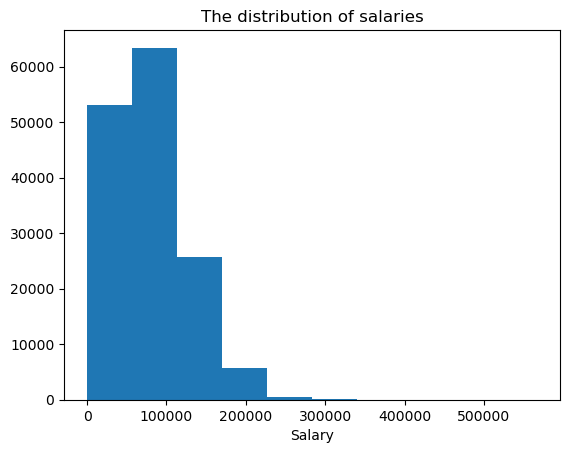

In [23]:
import matplotlib.pyplot as plt
plt.hist(df['TotalPay'])
plt.title("The distribution of salaries")
plt.xlabel("Salary")
plt.show()

### Get the job titles that has a department :

In [48]:
JobTitle_with_department = df[df['JobTitle'].str.contains('DEPARTMENT\)')][['JobTitle']]
JobTitle_with_department['Department'] = [dept[1][:-1] for dept in JobTitle_with_department['JobTitle'].str.split('\(')]
JobTitle_with_department

,JobTitle,Department
1,CAPTAIN III (POLICE DEPARTMENT),POLICE DEPARTMENT
2,CAPTAIN III (POLICE DEPARTMENT),POLICE DEPARTMENT
4,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",FIRE DEPARTMENT
6,"BATTALION CHIEF, (FIRE DEPARTMENT)",FIRE DEPARTMENT
8,"BATTALION CHIEF, (FIRE DEPARTMENT)",FIRE DEPARTMENT
...,...,...
16285,"ASSISTANT CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",FIRE DEPARTMENT
16946,"INSPECTOR III, (POLICE DEPARTMENT)",POLICE DEPARTMENT
17541,LIEUTENANT III (POLICE DEPARTMENT),POLICE DEPARTMENT
32623,"BATTALION CHIEF, (FIRE DEPARTMENT)",FIRE DEPARTMENT


### Make a pie chart representing the percentage of employees in each department :

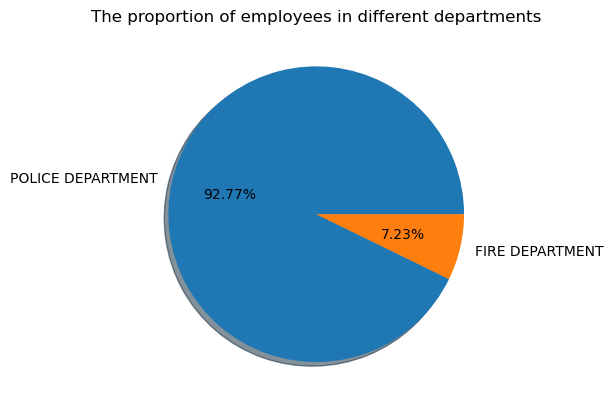

In [53]:
Unique_departments_counts = JobTitle_with_department['Department'].value_counts(normalize=True)
plt.pie(Unique_departments_counts, shadow=True, labels=['POLICE DEPARTMENT', 'FIRE DEPARTMENT'], autopct="%1.2f%%")
plt.title("The proportion of employees in different departments")
plt.show()

## Grouped Analysis

### Mean :

In [54]:
df.groupby('Year')['TotalPay'].mean()

Year
2011    71744.103871
2012    74113.262265
2013    77611.443142
2014    75463.918140
Name: TotalPay, dtype: float64

We notice that the mean salary grouped by <code>Year</code> variable is increasing between the years 2011 and 2013 to reach its maximum in the last year (2013) but, in 2014 it decreased suddenly compared to the year before maybe because of a crisis in California or there is another reason that makes that occur.

### Median :

In [55]:
df.groupby('Year')['TotalPay'].median()

Year
2011    68213.240
2012    70714.680
2013    74500.015
2014    72359.980
Name: TotalPay, dtype: float64

### Minimum :

In [56]:
df.groupby('Year')['TotalPay'].min()

Year
2011      0.00
2012      0.00
2013      0.00
2014   -618.13
Name: TotalPay, dtype: float64

### Maximum :

In [57]:
df.groupby('Year')['TotalPay'].max()

Year
2011    567595.43
2012    362844.66
2013    347102.32
2014    471952.64
Name: TotalPay, dtype: float64

## Simple Correlation Analysis

### Calculating the correlation between TotalPay (Salary) variable and the other variables :

In [58]:
df.corr()['TotalPay'].sort_values(ascending=False)

TotalPay            1.000000
TotalPayBenefits    0.977313
BasePay             0.954693
Benefits            0.632202
OvertimePay         0.504860
OtherPay            0.470499
Year                0.032090
Id                 -0.211478
Name: TotalPay, dtype: float64

### Using a scatter plot to illustrate the relationship between TotalPay and TotalPayBenefits variables :

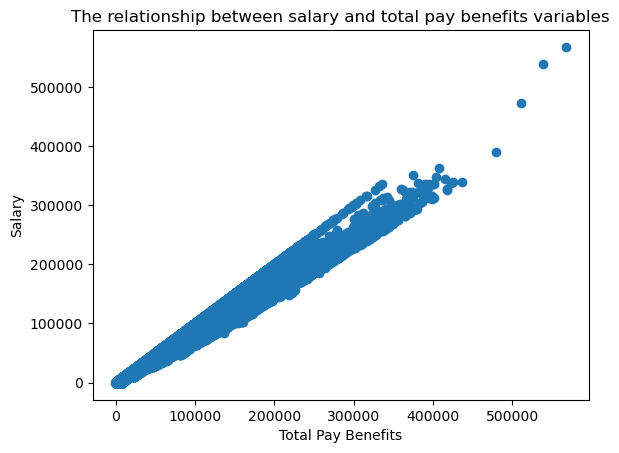

In [40]:
plt.scatter(df['TotalPayBenefits'], df['TotalPay'])
plt.title('The relationship between salary and total pay benefits variables')
plt.xlabel('Total Pay Benefits')
plt.ylabel('Salary')
plt.show()

## Summary of Insights

* The salary variable is extremely sparse as the standard deviation is so important (50517.005) so there is a difference between employees in terms of their annual total pay and so we could notice this when we examine the range of salaries in this dataset.
* The minimum of Total Pay is negative which is not logical and that could be the result of a misprint or a typo.
* The mean and median of salaries in this dataset are not that close so, our data doesn't have a symmetrical distribution and is probably skewed.
* The most presented salary is 0 so according to our dataset a lot of employees don't get an annual pay like the others or they just didn't mention their total salary which makes more sense though.
* The distribution of salaries is left skewed and most employees have a salary between 0 and 100000.
* The employees who mentioned the department they belong to have a specific distribution; 92.77% of them work in Police Department and the rest have an occupation in Fire Department with a percentage of 7.23%.
* Grouped by Year, the mean salary of all employees has increased from 2011 to 2013 but in the year of 2014, it has declined by more than 2000; This could be explained by a crisis or a problem that occur in California that year which made salaries drop off that way.
* There is a strong positive correlation between TotalPay and BasePay in one hand and TotalPay and TotalPayBenefits in another hand so, as TotalPayBenefits of an employee increase, their salary becomes more important and vice-versa.

# Good Luck!